# Import Modules

In [2]:
import os
import tarfile
from six.moves import urllib
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

# Download and Checking the Data

In [3]:
root = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
URL = root + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url = URL, housing_path = HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(URL, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
fetch_housing_data()

In [4]:
def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [5]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


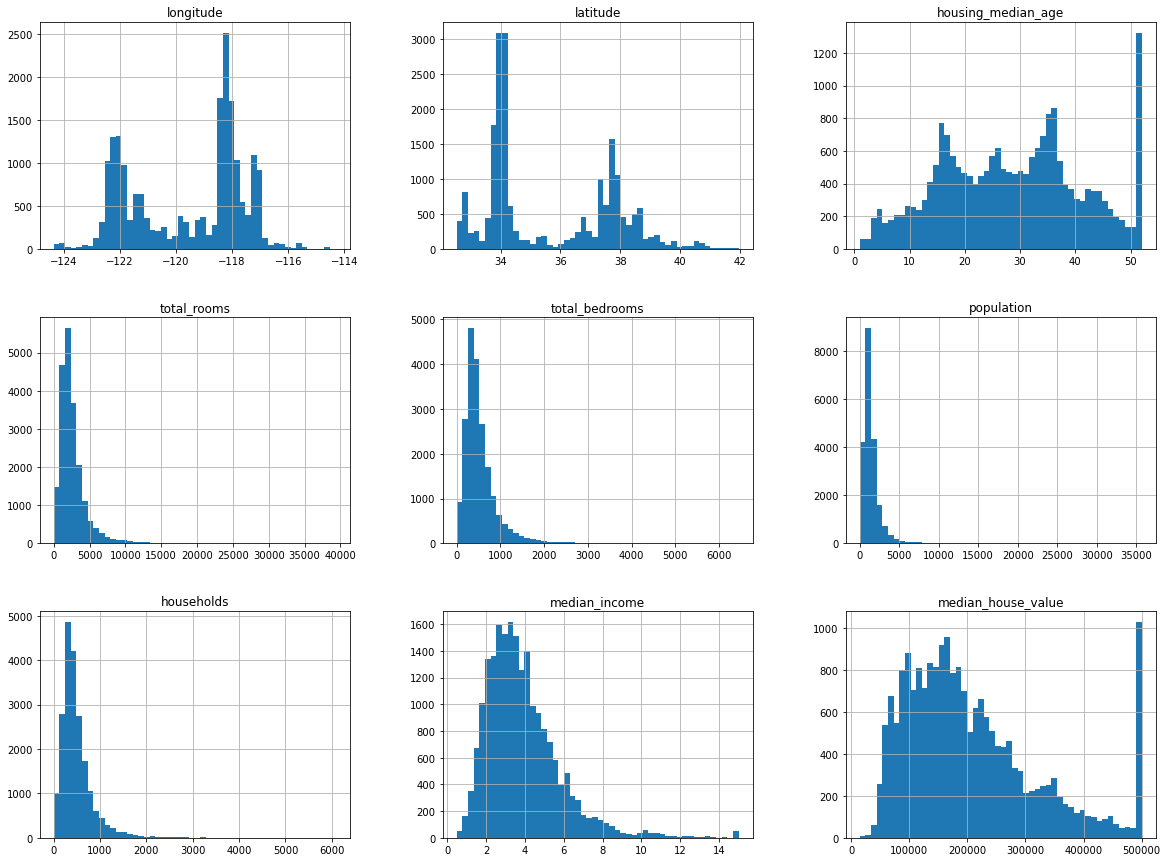

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins = 50, figsize = (20, 15))
plt.show()

# Create a Test Set

### General way but not the best way

In [8]:
# import numpy as np

# def split_train_test(data, test_ratio):
#     shuffled_indices = np.random.permutation(len(data))
#     test_set_size = int(len(data) * test_ratio)
#     test_indices = shuffled_indices[:test_set_size]
#     train_indces = shuffled_indices[test_set_size:]
#     return data.iloc[train_indices], data.iloc[test_indices]

### Another way to split

In [9]:
# from zlib import crc32

# def test_set_check(identifier, test_ratio):
#     return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

# def split_train_test_by_id(data, test_ratio, id_column):
#     ids = data[id_column]
#     in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
#     return data.loc[~in_test_set], data.loc[in_test_set]

In [10]:
# housing_with_id = housing.reset_index()
# housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
# train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

### Sklearn way

In [8]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

In [9]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace = True)

<AxesSubplot:>

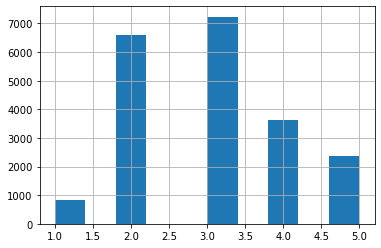

In [10]:
housing["income_cat"].hist()

# Stratified Sampling

In [12]:
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 0)

for train_idx, test_idx in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_idx]
    strat_test_set = housing.loc[test_idx]
    
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis = 1, inplace = True)

# Visualizing Data

In [13]:
housing = strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

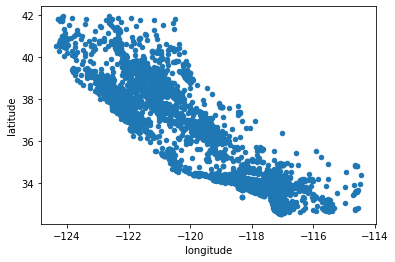

In [17]:
housing.plot(kind = "scatter", x = "longitude", y = "latitude")

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

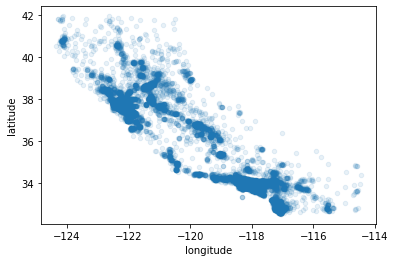

In [28]:
housing.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.1)

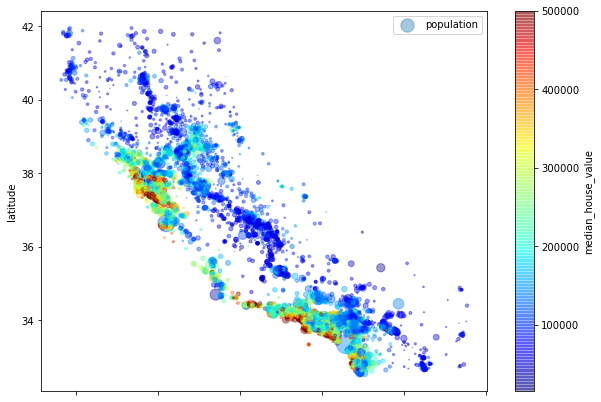

In [29]:
housing.plot(kind="scatter", x = "longitude", y = 'latitude', alpha = 0.4,
            s = housing["population"] / 100, label = "population", figsize=(10, 7),
            c = "median_house_value", cmap = plt.get_cmap("jet"), colorbar = True,
)

plt.legend()

# Correlations

## Traditional way

In [30]:
corr_mat = housing.corr()

In [31]:
corr_mat['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688883
total_rooms           0.137469
housing_median_age    0.107144
households            0.069177
total_bedrooms        0.053544
population           -0.023797
longitude            -0.043236
latitude             -0.145570
Name: median_house_value, dtype: float64

**Note:**
- Correlation coefficient ranges **from -1 to 1**
- **Close to 1** => there's a strong positive correlation
 - Ex: med house vals tends to go up when med income goes up
- **Close to -1** => there's a strong negative correlation
 - Ex: small negative correlation between latitude and the med house vals... => prices have a slight tendency to go down when u go north


## Pandas Way

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

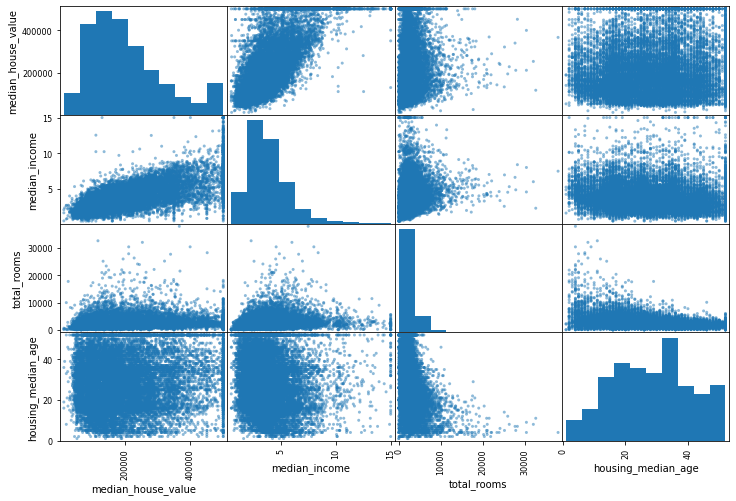

In [32]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

scatter_matrix(housing[attributes], figsize = (12, 8))

# Prepare the Data for ML Algorithms

In [33]:
housing = strat_train_set.drop("median_house_value", axis = 1)
housing_labels = strat_train_set["median_house_value"].copy()

### Data Cleaning

**Three options to clean**:
- Get rid of the corresponding districts. **(using dropna())**
- Get rid of the whole attribute. **(drop())**
- Set the values to some value (zero, the mean, the median, etc). **(using fillna())**

*Note for option 3:*

<blockquote>
    Should compute the med val on the training set and use it to fill the missing values in the training set, but also <b>not forget to save the med that have been computed.</b> Use it to replace missing values in the test set to eval our system, and also once the system goes live to replace missing values in the new data.
</blockquote>

In [34]:
# housing.dropna(subset=["total_bedrooms"]) #option 1
# housing.drop("total_bedrooms", axis = 1) #option 2
median = housing["total_bedrooms"].median() #option 3
housing["total_bedrooms"].fillna(median, inplace = True)

#### Compute the med value using sklearn

In [36]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = "median")

In [37]:
housing_num = housing.drop("ocean_proximity", axis = 1)

In [38]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [39]:
imputer.statistics_

array([-118.49  ,   34.25  ,   29.    , 2128.5   ,  436.    , 1167.    ,
        410.    ,    3.5341])

#### Use this imputer to transform the training set by replacing missing values by the learned medians

In [40]:
X = imputer.transform(housing_num)

In [41]:
housing_tr = pd.DataFrame(X, columns = housing_num.columns)

**Note:**
<blockquote> Because the result is a plain np array containning the transformed features. Trans it into a Pandas DataFrame </blockquote>

### Handling Text and Categorical Attributes

In [42]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
10275,<1H OCEAN
20601,INLAND
20138,<1H OCEAN
18028,<1H OCEAN
16289,INLAND
4622,<1H OCEAN
15280,NEAR OCEAN
17228,<1H OCEAN
14268,NEAR OCEAN
1229,INLAND


#### OrdinalEncoder class from sklearn

In [43]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

In [45]:
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [4.],
       [0.],
       [4.],
       [1.]])

In [46]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

**Note:**

<blockquote>
    This method has an issue: ML algorithms will assume that 2 nearby vals are more similar than 2 distant vals
</blockquote>

**Solution:**

<blockquote>
    Create one binary attribute per category: one attr equal to 1 when the category is "1H OCEAN" (and 0 otherwise) => One-hot encoding. New attr are sometimes called dummy attr
</blockquote>

#### One-hot Encode

In [48]:
from sklearn.preprocessing import OneHotEncoder

In [49]:
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

**Note:**

<blockquote>
    Output is a SciPy sparse mat instead of a NumPy array. Useful when we have categorical attr with thousand categories. After one-hot encode, we get a mat with thousands of cols, and it's full of zeros except for a single 1 per row => A sparse mat only stores the location of the non-zero elements.
</blockquote>